# Principal Component Analysis (PCA)
 Implementing PCA with numpy

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time



In [2]:
from tensorflow.keras.datasets.mnist import load_data

### Steps to implement PCA

1. Standardize the d-dimensional dataset

2. Construct the covariance matrix

3. Decompose the covariance matrix into its eigenvectors and eigenvalues

4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors

5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k <= d).

6. Construct a project matrix, W, from the "top" k eigenvectors

7. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace


In [73]:
# Load data
(X_train, y_train), (X_test, y_test) = load_data()

### Visualize Images

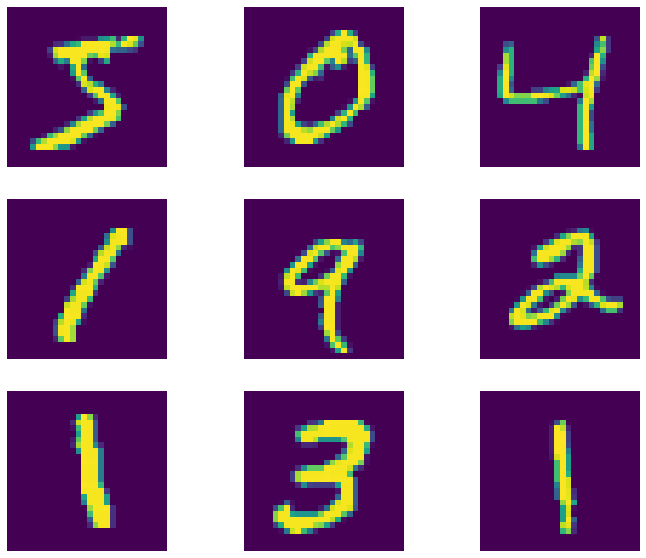

In [7]:
rows, cols = 3, 3
count = 0
fig = plt.figure(figsize=(12, 10))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(X_train[count])
        plt.axis("off")
        count += 1

### Simple Gaussian Bayes Classifier

In [75]:
# X_train, X_test = X_train / 255, X_test / 255
X_train = np.reshape(X_train, (-1, 28*28))
X_test = np.reshape(X_test, (-1, 28*28))

In [22]:
def accuracy(y, y_pred):
    return np.mean(y == y_pred)

In [35]:
from sklearn.linear_model import LogisticRegression

num_classes = np.unique(y_train)
start = time.time()
clf = LogisticRegression(C=50. / len(X_train), penalty="l2", tol=0.1)
clf.fit(X_train, y_train)
end = time.time() - start
print(f"It took: {end:.3f}s to train")
y_train_preds = clf.predict(X_train)
print(f"Train acc: {accuracy(y_train, y_train_preds)}")
y_test_preds = clf.predict(X_test)
print(f"Test acc: {accuracy(y_test, y_test_preds):.3f}")


/home/tnguyen2921/miniconda3/envs/enhanceIT/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
It took: 123.088s to train
Train acc: 0.8916166666666666
Test acc: 0.899


In [38]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
clf = GaussianNB()
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
print(f"Train acc: {accuracy(y_train, y_train_preds)}")
y_test_preds = clf.predict(X_test)
print(f"Test acc: {accuracy(y_test, y_test_preds):.3f}")
end = time.time() - start
print(f"It took {end:.2f}s to train")

Train acc: 0.5649
Test acc: 0.556
It took 61.04s to train


## Implementing PCA

### Step 1: standardize the d-dimensional dataset



In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Step 2: Construct Covariance Matrix

In [77]:
conv_mat = np.cov(X_train.T)


### Step 3: Decompose the covariance matrix into its eigenvectors and eigenvalues

In [78]:
eigen_vals, eigen_vecs = np.linalg.eig(conv_mat)

### Step 4: Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors

In [79]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

### Step 5: Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k <= d).

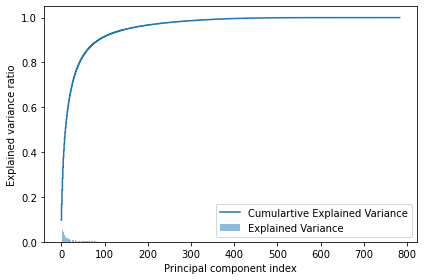

In [80]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var = np.cumsum(var_exp)
xs = range(len(var_exp))
plt.bar(xs, var_exp, alpha=0.5, align="center", label="Explained Variance")
plt.step(xs, cum_var, where="mid", label="Cumulartive Explained Variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()


In [81]:
thresh_ind = np.argwhere(cum_var > 0.95)[0][0]
thresh_ind

153

### Step 6: Construct a project matrix, W, from the "top" k eigenvectors



In [82]:
eigen_stacks = [eigen_pairs[i][1][:, np.newaxis] for i in range(thresh_ind)]
w = np.hstack(eigen_stacks)

### Step 7: Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace

In [83]:
X_train_pca = X_train.dot(w)
X_test_pca = X_test.dot(w)

### Retrain Logistic Regression and Naive Bayes classifiers

In [90]:
start = time.time()
lr_clf = LogisticRegression(C=50. / len(X_train), penalty="l2", tol=0.1)
lr_clf.fit(X_train_pca, y_train)
end = time.time() - start
print(f"It took: {end:.3f}s to train")
y_train_preds = lr_clf.predict(X_train_pca)
print(f"Train acc: {accuracy(y_train, y_train_preds)}")
y_test_preds = lr_clf.predict(X_test_pca)
print(f"Test acc: {accuracy(y_test, y_test_preds):.3f}")

It took: 27.348s to train
Train acc: 0.8750333333333333
Test acc: 0.877
/home/tnguyen2921/miniconda3/envs/enhanceIT/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
gb_clf = GaussianNB()
gb_clf.fit(X_train_pca, y_train)
y_train_preds = clf.predict(X_train_pca)
print(f"Train acc: {accuracy(y_train, y_train_preds)}")
y_test_preds = clf.predict(X_test_pca)
print(f"Test acc: {accuracy(y_test, y_test_preds):.3f}")
end = time.time() - start
print(f"It took {end:.2f}s to train")

Train acc: 0.37501666666666666
Test acc: 0.370
It took 1.51s to train


Both models took significantly less time to train. Despite reducing the number of features from 784 to 153, their performances did not suffer significantly. In fact, the logistic regression model got 87% accuracy compared to one trained on all features with 89% accuracy

### Plot confusion matrx

Text(0.5, 1.0, 'Confusion matrix')

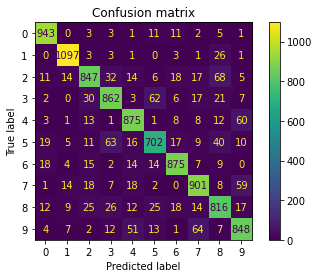

In [94]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_clf, X_test_pca, y_test)
plt.title("Confusion matrix")

5, 8 seem to be the digits that our model misclassified the most

In [124]:
import scipy.stats as st
def get_bad_preds(number):
    incorrects = (y_test != y_test_preds)
    res = y_test[np.squeeze(np.argwhere(y_test[incorrects] == number))]
    modes = st.mode(res)
    return modes, X_test[y_test == modes[0][0]]
res, arr = get_bad_preds(5)


Text(0.5, 0.98, 'Wrong predictions for digit 5')

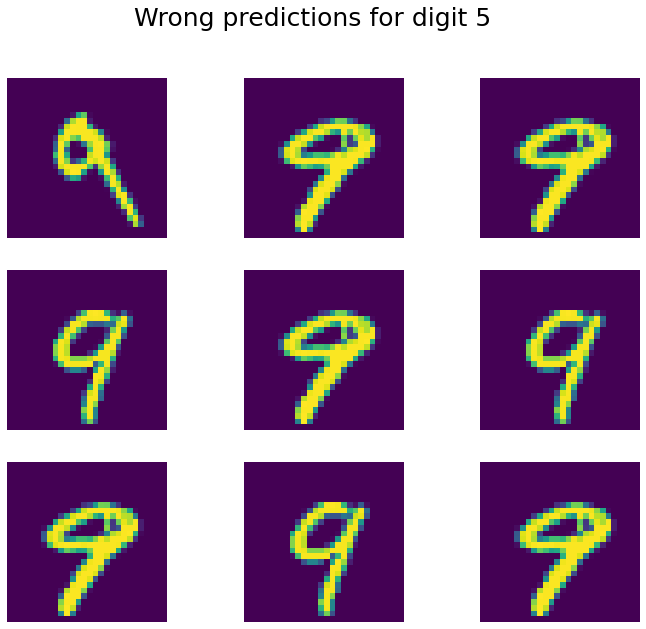

In [126]:
import random
rows, cols = 3, 3
count = 0
random.shuffle(arr)
fig = plt.figure(figsize=(12, 10))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(arr[count].reshape((28, 28)))
        plt.axis("off")
        count += 1
fig.suptitle("Wrong predictions for digit 5", fontsize=25)

Our model misclassifies 5 with 9 most often. These are some images that our model wrongly predicts.

In [118]:
res, arr = get_bad_preds(8)


Text(0.5, 0.98, 'Wrong predictions for digit 8')

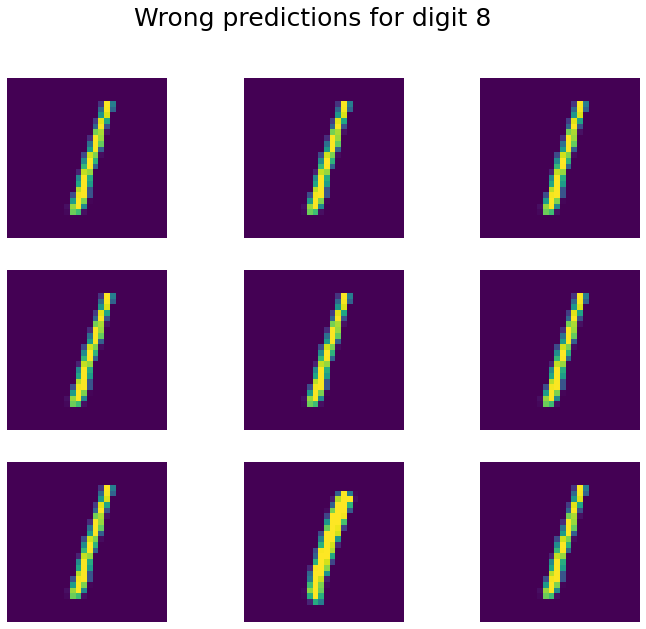

In [122]:
rows, cols = 3, 3
count = 0
random.shuffle(arr)
fig = plt.figure(figsize=(12, 10))
for row in range(rows):
    for col in range(cols):
        fig.add_subplot(rows, cols, count + 1)
        plt.imshow(arr[count].reshape((28, 28)))
        plt.axis("off")
        count += 1
fig.suptitle("Wrong predictions for digit 8", fontsize=25)